# Linear Regression
__~ Anish Sachdeva__

$ x_1 x_2 x_3 .. x_m $  --> $y_1 y_2 y_3 ... y_m$


x --> y



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv("Linear_X_Train.csv").values
Y=pd.read_csv("Linear_Y_Train.csv").values

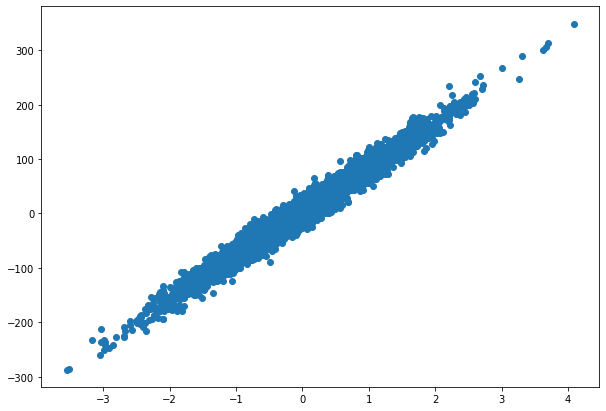

In [4]:
plt.figure(figsize=(10, 7))
plt.scatter(X,Y)
plt.show()

## Cost Function
__m__ = No. of points

$$
f(x_i) = \theta_0 + \theta_1 \cdot x
$$

$$
J_{\theta}(x)  = \frac{1}{m} \Sigma (f(x_i) - y_i) ^2
$$

$$
$$

# Normalise Data

$$
\mu = \bar{X} \\
\sigma = std(X)
$$

In [6]:
mu = X.mean()
sigma = X.std()
X = (X - mu) / sigma
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

# Linear Regression

In [7]:
def hypothesis(theta, x):
    return theta[0] + theta[1] * x

In [18]:
hypothesis([0, 2], np.array([1, 2, 3]))

array([2, 4, 6])

The cost function is defined as 
$$
J_{\theta}(x) = \frac{1}{m} \Sigma (h_{\theta}(x_i) - y_i) ^2
$$

$$
J_{\theta}(x) = \frac{1}{m} \Sigma |h_{\theta}(x_i) - y_i|
$$

In [19]:
X

array([[-0.25352061],
       [-0.55541377],
       [ 1.07380656],
       ...,
       [-0.26950343],
       [ 1.72730762],
       [-0.4575866 ]])

In [20]:
X.shape

(3750, 1)

In [21]:
Y

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [22]:
Y.shape

(3750, 1)

In [23]:
def error(theta, X, Y):
    err = 0
    m, _ = X.shape # number of entries
    
    for i in range(m):
        err += (hypothesis(theta, X[i]) - Y[i]) ** 2
        
    return err / m

In [39]:
((hypothesis([0, 200/3], X) - Y) ** 2).sum() / X.shape[0]

366.69623790640964

In [41]:
X.shape[0]

3750

In [93]:
# vectorized
def error_advanced(theta, X, Y):
    return ((hypothesis(theta, X) - Y) ** 2).mean()

In [42]:
error([1, 2], X, Y)

array([6260.35936676])

In [45]:
error_advanced([1, 2], X, Y)

6260.359366755907

The Gradient of the hypothesis is defined as 
$$
\frac{\delta J_{\theta}(x)}{\delta \theta_{0}} = \frac{1}{m} \Sigma (f_{\theta}(x_i) - y_i)
$$

$$
\frac{\delta J_{\theta}(x)}{\delta \theta_{1}} = \frac{1}{m} \Sigma (f_{\theta}(x_i) - y_i) \cdot x_i
$$

In [46]:
def gradient(theta, X, Y):
    m, _ = X.shape
    grad = np.zeros((2,))
    
    for i in range(m):
        hx = hypothesis(theta, X[i])
        grad[0] += hx -Y[i]
        grad[1] += (hx - Y[i]) * X[i]
        
    # return [dJ/dtheta_0 dJ/ d theta_1]
    return grad / m

In [48]:
gradient([0, 0], X, Y)

array([ -0.68386897, -79.90573694])

In [59]:
((hypothesis([1, 2], X) - Y) * X).sum() / 3750

-77.90573694249979

In [60]:
def gradient_vectorized(theta, X, Y):
    f = hypothesis(theta, X)
    m = X.shape[0]
    grad = np.zeros(2,)
    grad[0] = (f - Y).sum()
    grad[1] = ((f - Y) * X).sum()
    return grad / m

In [61]:
gradient([1, 2], X, Y)

array([  0.31613103, -77.90573694])

In [62]:
gradient_vectorized([1, 2], X, Y)

array([  0.31613103, -77.90573694])

In [63]:
def gradient_descent(X, Y, lr=0.1, max_itr=100):
    m, _ = X.shape
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_itr):
        err = error(theta, X, Y) # cost
        error_list.append(err)
        theta_list.append((theta[0], theta[1]))
        # learn
        theta += -lr * gradient(theta, X, Y)
        if i % 10 == 0:
            print(f'Iteration no {i}, cost of the parameters are {err}')
        
    return theta, theta_list, error_list

In [92]:
# training our parameters on our data
theta, theta_list, error_list = gradient_descent(X, Y, max_itr=200, lr=1)

Iteration no 0, cost of the parameters are [6576.35005246]
Iteration no 10, cost of the parameters are [190.95557937]
Iteration no 20, cost of the parameters are [190.95557937]
Iteration no 30, cost of the parameters are [190.95557937]
Iteration no 40, cost of the parameters are [190.95557937]
Iteration no 50, cost of the parameters are [190.95557937]
Iteration no 60, cost of the parameters are [190.95557937]
Iteration no 70, cost of the parameters are [190.95557937]
Iteration no 80, cost of the parameters are [190.95557937]
Iteration no 90, cost of the parameters are [190.95557937]
Iteration no 100, cost of the parameters are [190.95557937]
Iteration no 110, cost of the parameters are [190.95557937]
Iteration no 120, cost of the parameters are [190.95557937]
Iteration no 130, cost of the parameters are [190.95557937]
Iteration no 140, cost of the parameters are [190.95557937]
Iteration no 150, cost of the parameters are [190.95557937]
Iteration no 160, cost of the parameters are [190.

In [87]:
theta

array([-5.13254768e+127, -5.99705534e+129])

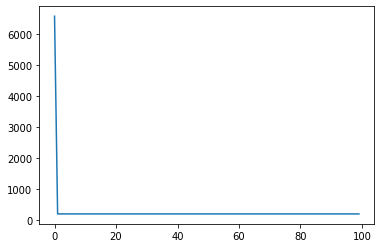

In [90]:
plt.plot(error_list)

In [69]:
Y_pred = hypothesis(theta, X)
Y_pred

array([[-19.57388181],
       [-43.69687794],
       [ 86.48717332],
       ...,
       [-20.85100092],
       [138.7056574 ],
       [-35.87992564]])

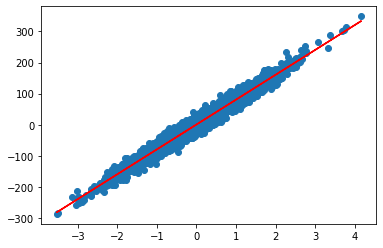

In [70]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [72]:
hypothesis(theta, 100)

7991.257563217987

# Predict for New Datafor X_test

In [73]:
X_test = pd.read_csv("Linear_X_test.csv").values

In [74]:
# normalizing the data
X_test = (X_test - mu) / sigma

In [75]:
X_test

array([[-1.85483984],
       [-0.8378731 ],
       [-2.51228473],
       ...,
       [ 0.1671261 ],
       [-0.24216081],
       [-0.64776095]])

In [76]:
Y_pred = hypothesis(theta, X_test)

In [77]:
Y_pred

array([[-147.52847525],
       [ -66.26699842],
       [-200.06209345],
       ...,
       [  14.0382031 ],
       [ -18.66616899],
       [ -51.07594693]])

In [45]:
df = pd.DataFrame(data=Y_pred, columns=['y'])
df.to_csv("ans.csv", index=False)

# Evaluation

In [78]:
def evaluate(Y_actual, Y_pred):
    num = ((Y_actual - Y_pred) ** 2).sum()
    denom = ((Y_actual - Y_actual.mean()) ** 2).sum()
    
    return (1 - (num / denom)) * 100

In [79]:
evaluate(hypothesis(theta, X), Y)

97.00927535328225

## Scikit -Learn Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()

In [82]:
model.fit(X, Y)

LinearRegression()

In [83]:
Y_pred = model.predict(X)
Y_pred

array([[-19.57388181],
       [-43.69687794],
       [ 86.48717332],
       ...,
       [-20.85100092],
       [138.7056574 ],
       [-35.87992564]])

In [84]:
model.score(X, Y)

0.9709612233822353